In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_index.nc")

In [3]:
index = index.pc
index['time'] =  index.indexes['time'].to_datetimeindex()

/tmp/ipykernel_938380/1854046031.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  index['time'] =  index.indexes['time'].to_datetimeindex()


In [4]:
nao = index.sel(hlayers = 100000, mode = 'NAO')

In [5]:
ea = index.sel(hlayers = 100000, mode = 'EA')

In [6]:
nao_df = nao.to_dataframe().reset_index()

In [7]:
ea_df = ea.to_dataframe().reset_index()

In [23]:
def plot(fieldmean_df):
    fdm_max = fieldmean_df.groupby('time').max()['pc']
    fdm_min = fieldmean_df.groupby('time').min()['pc']
    fdm_mean = fieldmean_df.groupby('time').mean()['pc']
    fdm_ex = fieldmean_df[fieldmean_df['ens']==0]['pc']
    x = fieldmean_df[fieldmean_df['ens']==0]['time']

    fig,ax = plt.subplots(figsize = (8,4),dpi = 500)
    # ax.plot(x,fdm_ex,color = 'k',linewidth = 1,label = 'ensemble_example')
    ax.fill_between(x,fdm_max,fdm_min,color = 'grey',label = 'ensemble_range')
    ax.fill_between(x,[-2],[2], color = 'lightgrey',alpha = 0.7)
    # ax.plot(x,fdm_mean,color = 'r',linewidth = 2,label = 'ensemble_mean')
    # ax.legend(loc = 'upper left')
    ax.plot(x,[[-2]]*len(x),'k--')
    ax.plot(x,[[2]]*len(x),'k-')
    ax.set_xlabel('time')
    ax.set_ylabel('std')

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_visible(True)


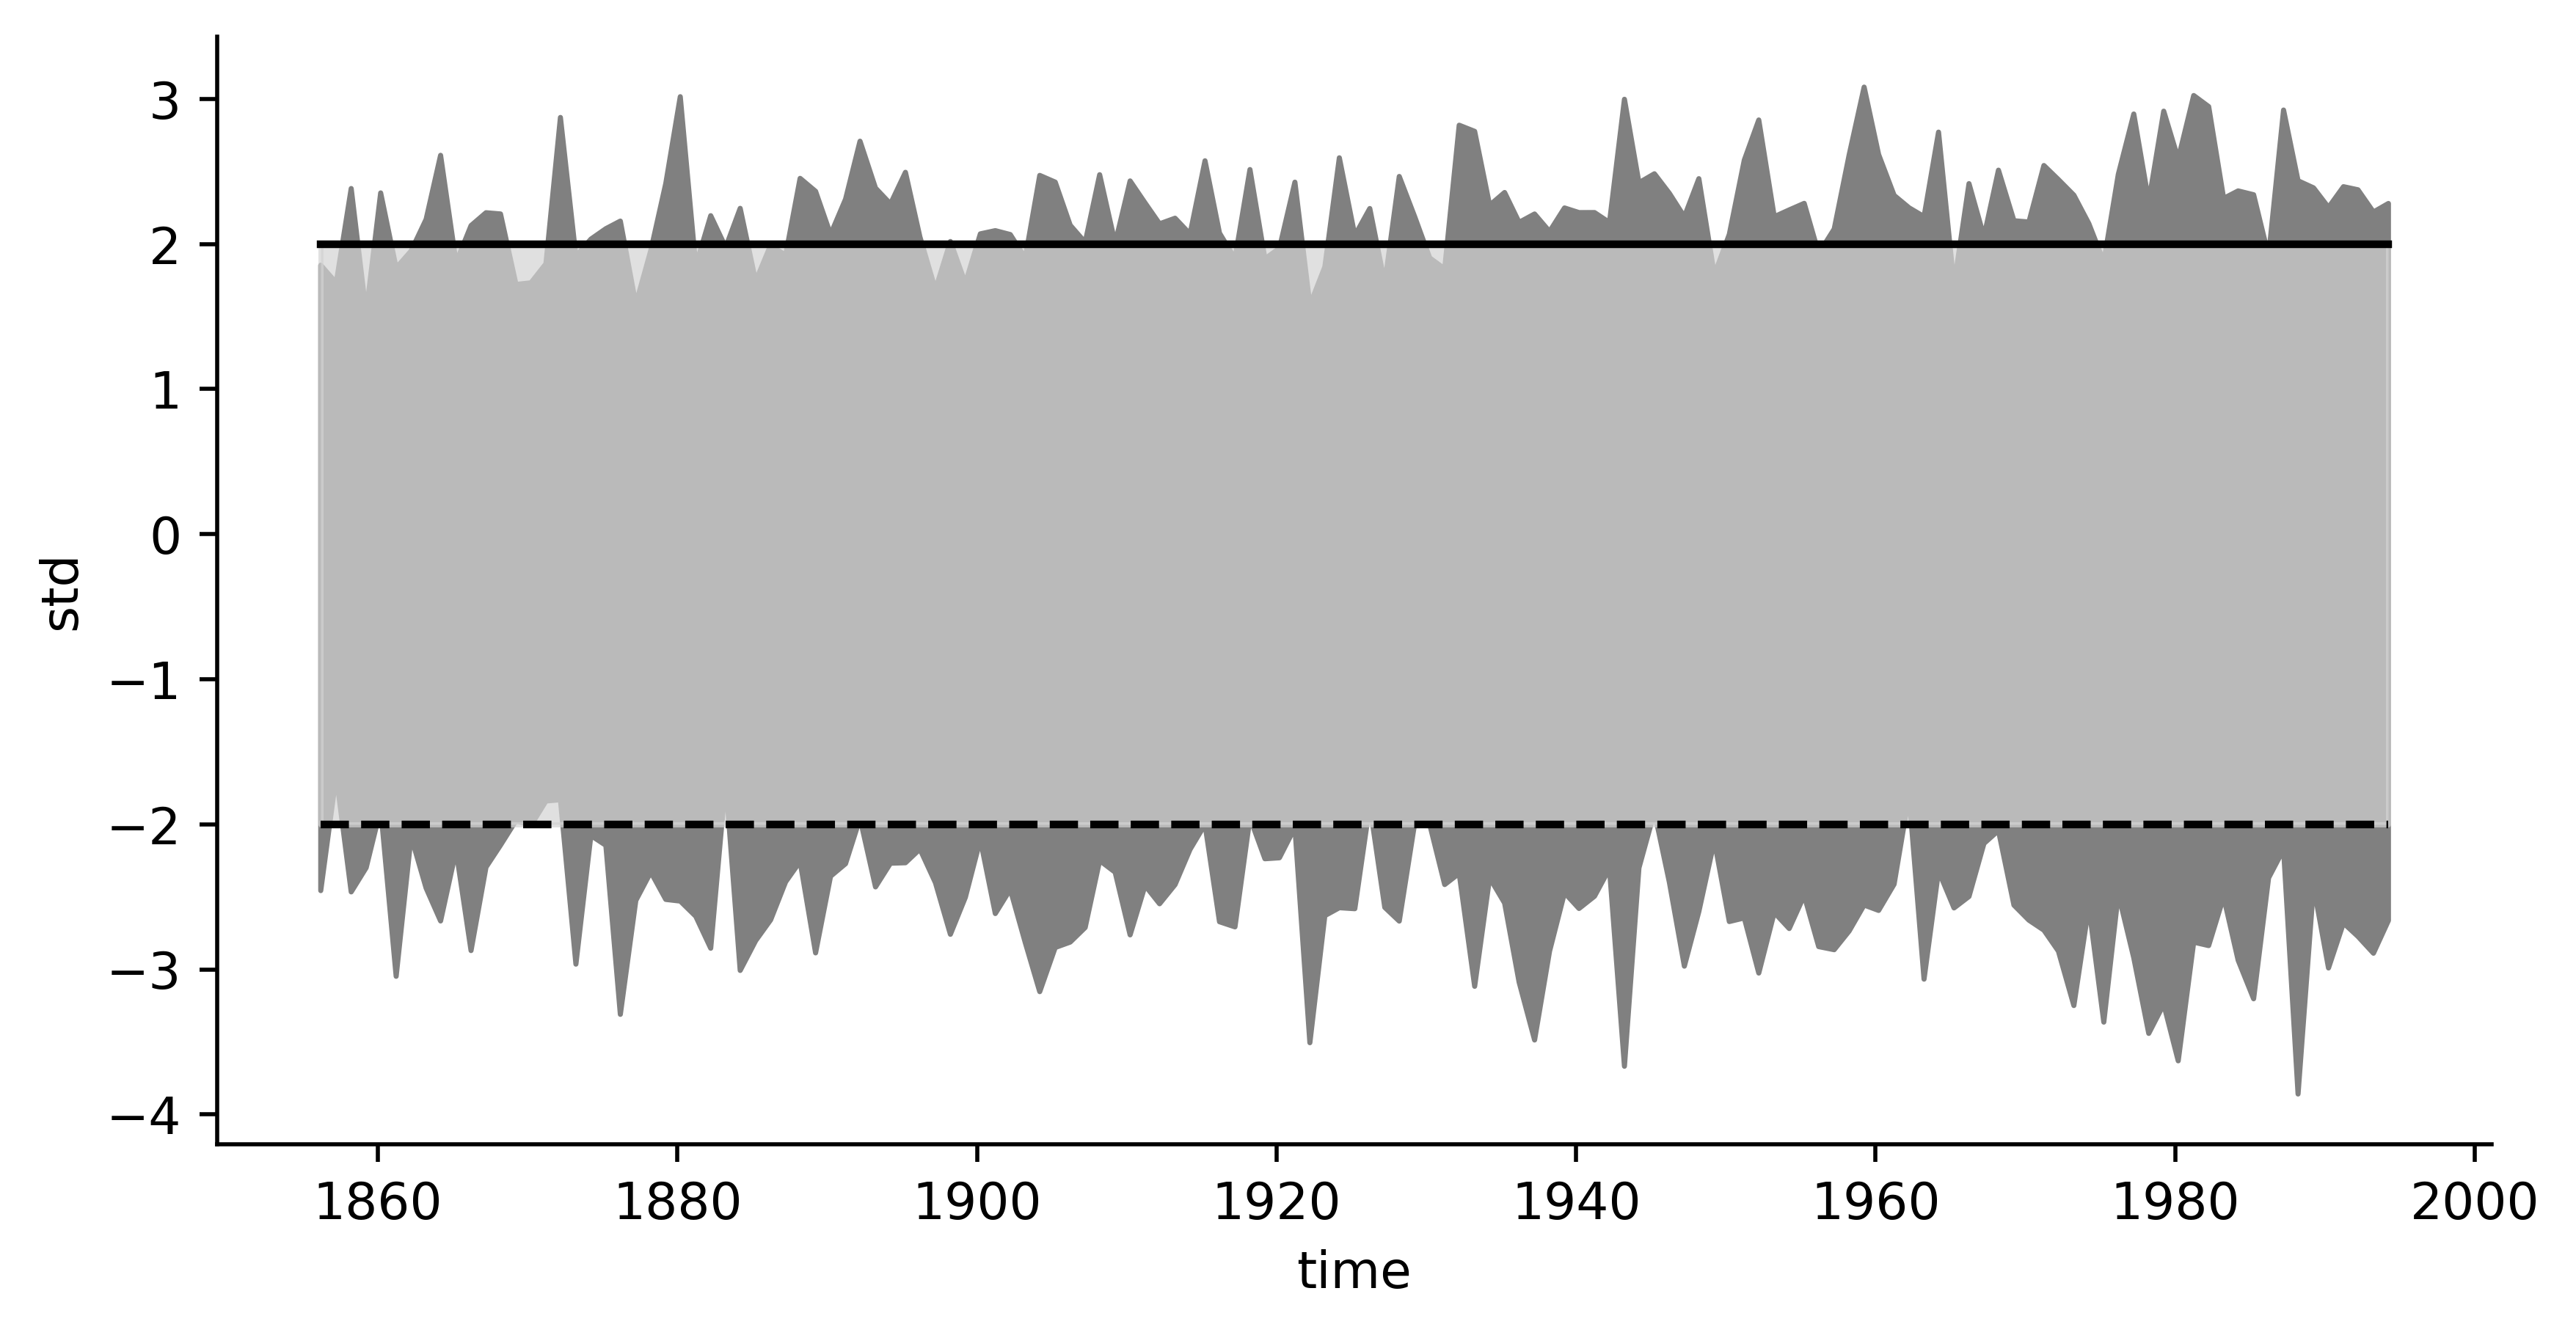

In [24]:
plot(nao_df)

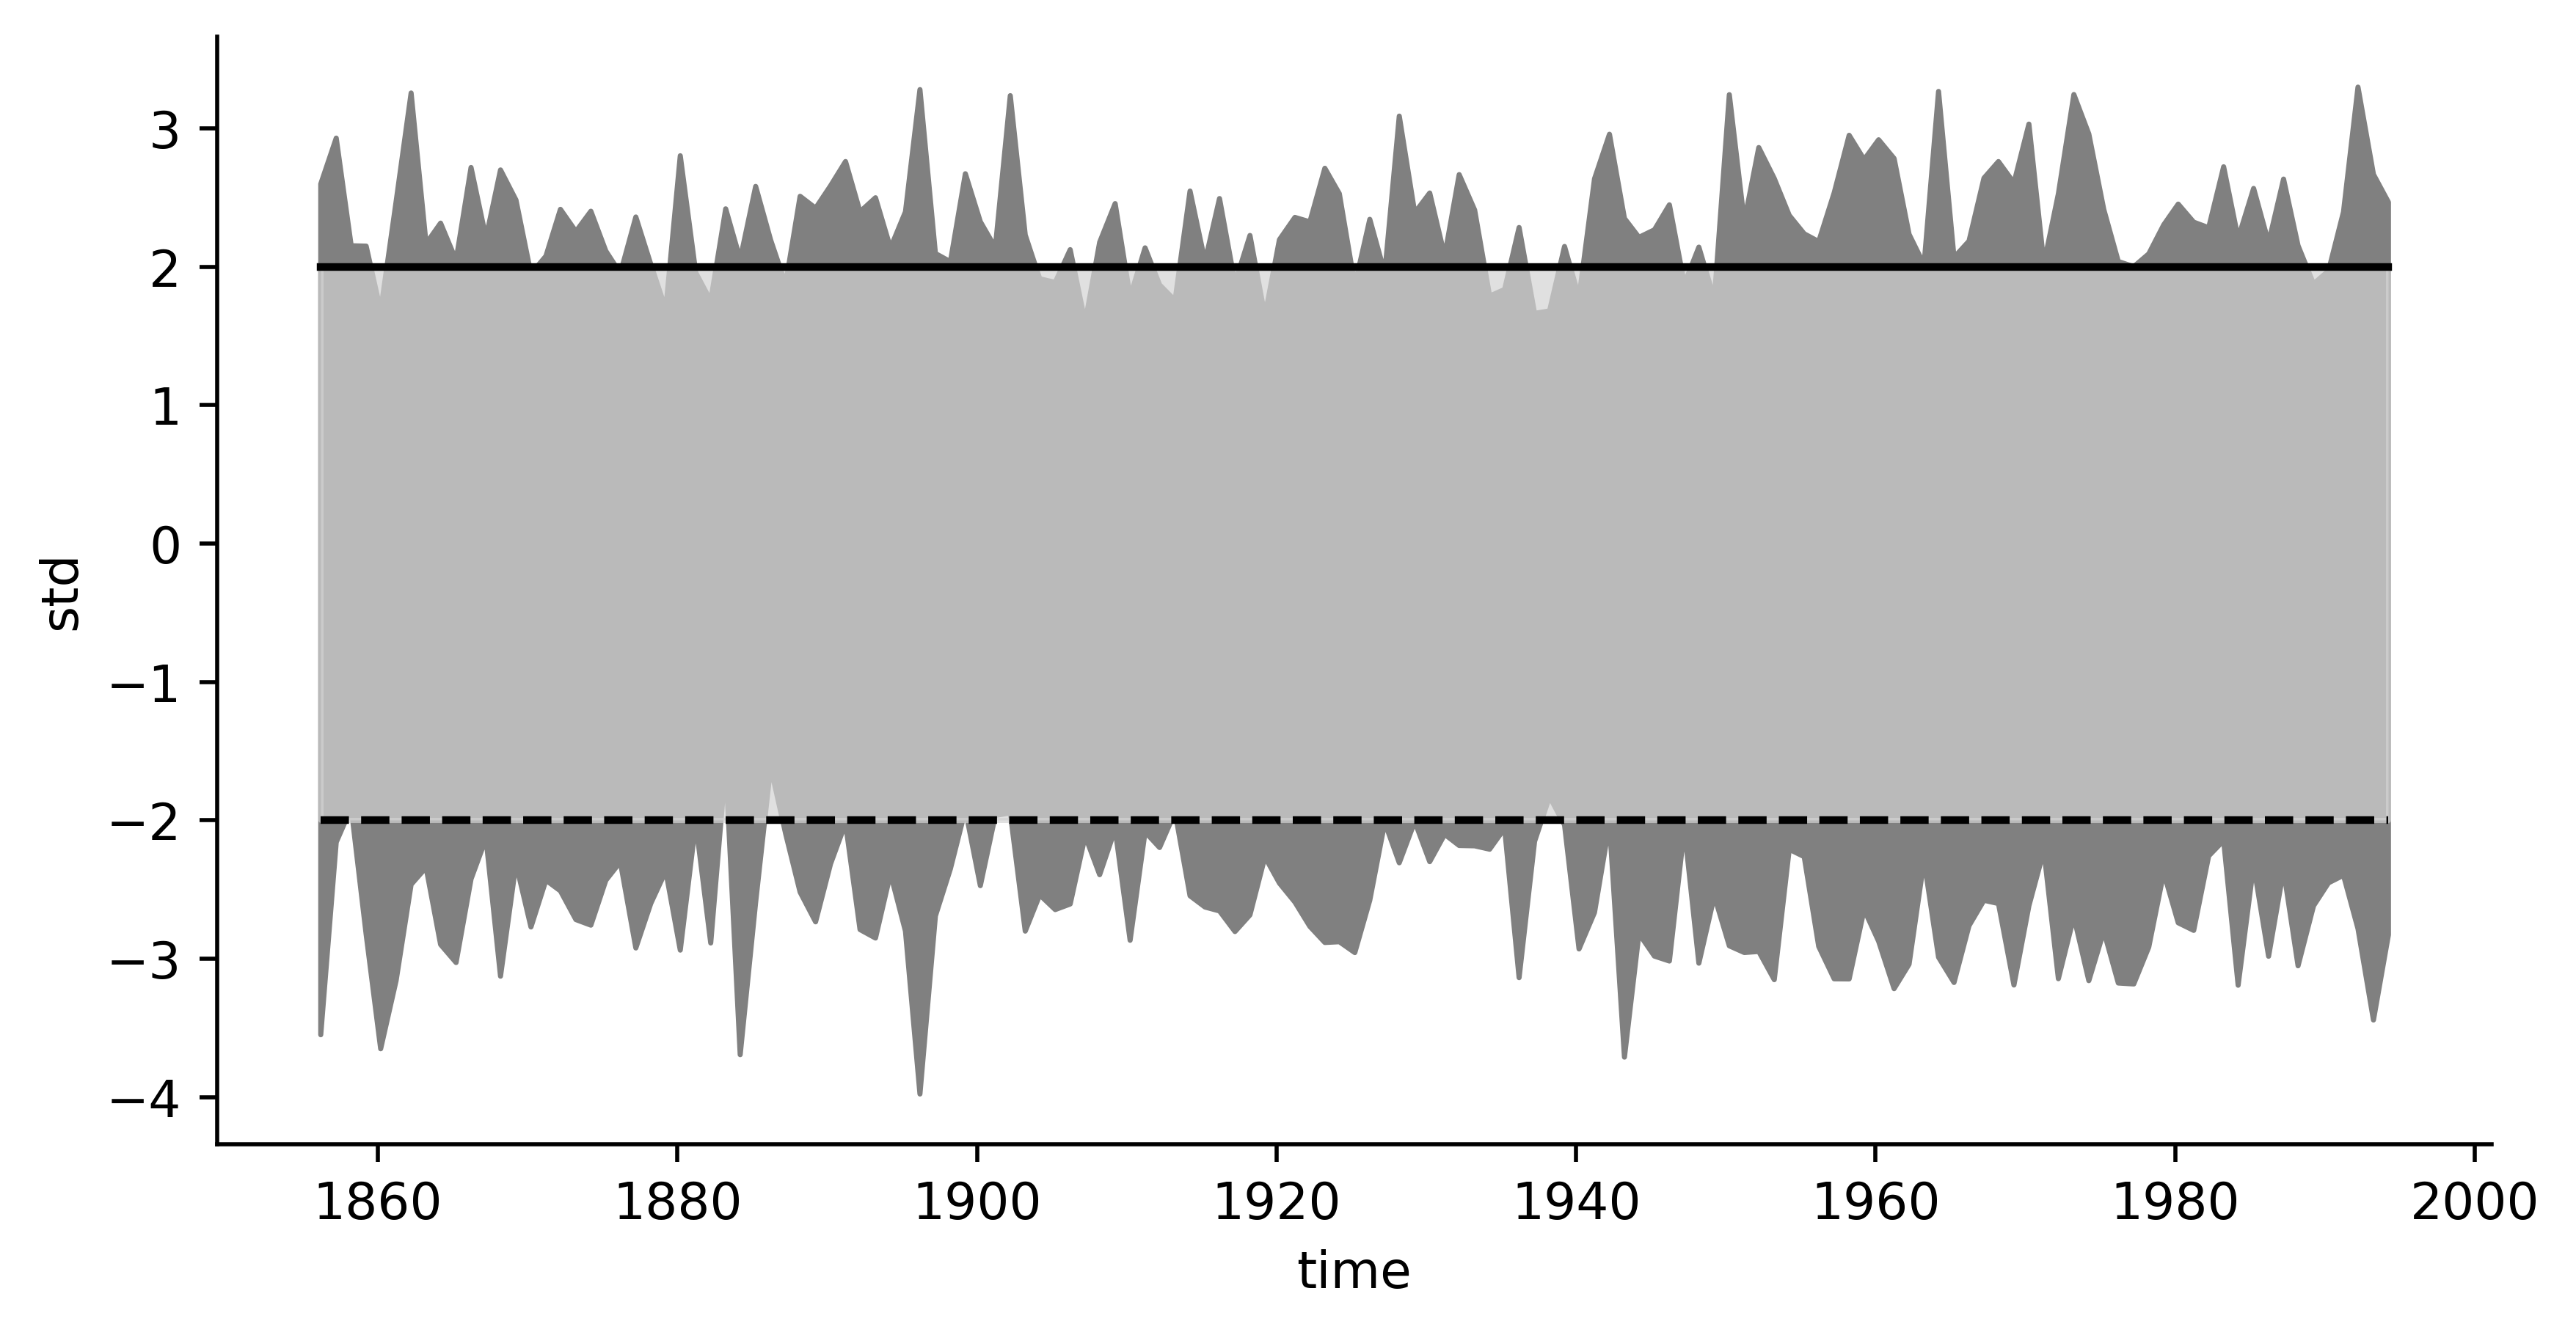

In [25]:
plot(ea_df)